<a href="https://colab.research.google.com/github/gjhernandezp/algorithms/blob/master/Lab4/gjhernandezpAlgorithmicToolboxWeek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I Solving the Sum of Two Digits Programming Challenge

## C++

In [1]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [2]:
!g++ APlusB.cpp -o APlusB -std=c++11
!./APlusB

6
8
14

### Test input output files

In [5]:
%%writefile input1.txt
4 8

Writing input1.txt


In [6]:
%%writefile output1.txt
12

Writing output1.txt


In [7]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [8]:
%%writefile output2.txt
4

Writing output2.txt


In [9]:
!./APlusB < input1.txt

12

In [10]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [11]:
!grep -xvFf output1.txt output1.txt 

In [12]:
!grep -xvFf output1.txt output2.txt 

4


In [13]:
!grep -xvFf output2.txt output1.txt 

12


In [14]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [15]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [16]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [17]:
!python sum.py

10 20
30


In [18]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [19]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [20]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [21]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

4
41 50 23 65
3250


### Test 1: Small numbers

In [22]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [23]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [24]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [25]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [56]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product_long.cpp


In [57]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [38]:
import random as rd
n = list(range(2, 21))
for i in range(20):
  random_1, random_2 = rd.choices(n, k=2)
  with open('random_ex.txt', 'w') as f:
    f.write("2\n")
    f.write(f"{random_1} {random_2}")
  !./max_pairwise_product_long < random_ex.txt

260
85
208
126
4
285
16
234
143
171
63
72
169
10
12
95
133
324
170
162


### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [44]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Overwriting Test2Write.cpp


In [45]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [46]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000
39999800000
^C


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [33]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Writing test_init_vectors.cpp


In [34]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [35]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [36]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [39]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
5
1254
^C


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [47]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [48]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [66]:
%%writefile efficient.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProductEfficient(const std::vector<int> &numbers)
{
    long long max_product = 0;   
    int n = numbers.size();  
    int index_max_1 = -1;   
    int index_max_2 = -1;   

    for (int i = 0; i < n; ++i)                                                 //2n
    {
        int current = numbers[i];   
        if (current > numbers[index_max_1])                                     //1
        {
            index_max_1 = i;                                                    //1
        }
    }

    for (int i = 0; i < n; ++i)                                                 //2n
    {
        if (i != index_max_1)
        {
            int current = numbers[i];                                           //1
            if (current > numbers[index_max_2])                                 //1
            {
                index_max_2 = i;                                                //1
            }
        }
    }
    max_product = (long long)numbers[index_max_1] * numbers[index_max_2];       //1
    return max_product;       
}

int main()  //N inst exec by line executed 
{
    int n;  //1
    std::cin >> n;  //1
    std::vector<int> numbers(n);                                                //n
    for (int i = 0; i < n; ++i)                                                 //2n
    {
        std::cin >> numbers[i];                                                 //1
    }

    std::cout << MaxPairwiseProductEfficient(numbers) << "\n";                           
    return 0; 
}

Overwriting efficient.cpp


Test with inputs 1 and 2



In [59]:
!g++ efficient.cpp -o efficient
!./efficient < input1.txt
!./efficient < input2.txt

90
40000000000


Test and time it with input 3

In [60]:
!g++ efficient.cpp -o efficient
!time ./efficient < input3.txt 

39999800000

real	0m0.105s
user	0m0.098s
sys	0m0.003s


20 stress tests

In [71]:
%%writefile 20StressTests.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

long long MaxPairwiseProduct(const std::vector<int> &numbers)
{
    long long max_product = 0;
    int n = numbers.size();
    int index_max_1 = -1;
    int index_max_2 = -1;

    for (int i = 0; i < n; ++i)
    {
        int current = numbers[i];
        if (current > numbers[index_max_1])
        {
            index_max_1 = i;
        }
    }
    for (int i = 0; i < n; ++i)
    {
        if (i != index_max_1)
        {
            int current = numbers[i];
            if (current > numbers[index_max_2])
            {
                index_max_2 = i;
            }
        }
    }
    max_product = (long long)numbers[index_max_1] * numbers[index_max_2];
    return max_product;
}

void coutInput(const std::vector<int> &numbers)
{
    int size = numbers.size();
    cout << size << endl;
    for (int i = 0; i < numbers.size(); ++i)
    {
        cout << numbers[i] << ' ';
    }
    cout << endl;
}

int main()
{
    srand((unsigned)time(NULL));

    for (int j = 0; j < 20; ++j)
    {
        int n = 1 + rand() % 10;
        vector<int> numbers(n);
        for (int i = 0; i < n; ++i)
        {
            int new_number = 1 + rand() % 1000;
            numbers[i] = new_number;
        }
        coutInput(numbers);
        std::cout << MaxPairwiseProduct(numbers) << endl;
    }
    return 0;
}

Overwriting 20StressTests.cpp


In [73]:
!g++ 20StressTests.cpp -o 20StressTests
!./20StressTests

3
766 857 717 
656462
3
350 743 688 
511184
5
926 238 201 516 649 
600974
8
149 606 179 357 81 324 535 374 
324210
5
878 842 470 91 316 
739276
4
128 621 889 984 
874776
7
123 334 432 163 748 357 400 
323136
10
224 400 909 372 5 87 729 86 762 615 
692658
1
926 
0
4
652 748 934 320 
698632
1
414 
0
2
112 397 
44464
8
234 82 411 748 830 119 147 481 
620840
2
899 390 
350610
6
255 828 146 692 590 112 
572976
3
867 955 154 
827985
4
241 825 485 654 
539550
6
596 50 744 181 132 506 
443424
9
313 625 427 793 966 677 182 383 932 
900312
10
528 623 951 639 125 817 946 631 783 186 
899646


Count executed instructions in code and verify with inputs 1,2 and 3


In [74]:
print(90+40000000000+39999800000)

79999800090


Calculate estimated time by instruction and number of instructions by second

In [78]:
print(str(39999800000/0.105) + ' instructions per second')

380950476190.4762 instructions per second


### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [79]:
%%writefile super.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int main()
{
    int n;                       
    std::cin >> n;               
    int first = 0;
    int second = 0;

    for (int i = 0; i < n; ++i)                 //2n
    {
        int current;
        std::cin >> current; 
        if (current > first || current > second)   
        {
            if (current > first)
            {
                int t = first;
                first = current;
                second = t;
            }
            else
            {
                second = current;
            }
        }
    }

    std::cout << (long long)first * second << "\n";
    return 0;
}

Writing super.cpp


Test with inputs 1 and 2


 

In [80]:
!g++ super.cpp -o super
!./super < input1.txt
!./super < input2.txt

90
40000000000


Test and time it with input 3

In [82]:
!time ./super < input3.txt

39999800000

real	0m0.057s
user	0m0.051s
sys	0m0.005s


20 stress tests 

In [83]:
%%writefile superStressTest.cpp
#include <iostream>
#include <vector>
#include <algorithm>

using namespace std;

int main()
{
    srand((unsigned)time(NULL));
    for (int j = 0; j < 20; ++j)
    {
        int n = 2 + rand() % 8;
        cout << n << endl;
        int first = 0;
        int second = 0;

        for (int i = 0; i < n; ++i)
        {
            int current = 1 + rand() % 1000;
            cout << current << '\t';

            if (current > first || current > second)
            {
                if (current > first)
                {
                    int t = first;
                    first = current;
                    second = t;
                }
                else
                {
                    second = current;
                }
            }
        }
        cout << endl;

        cout << (long long)first * second << "\n";
    }
    return 0;
}

Writing superStressTest.cpp


In [84]:
!g++ superStressTest.cpp -o superStressTest
!./superStressTest

7
175	169	419	250	188	444	39	
186036
8
349	184	463	21	835	118	843	459	
703905
8
406	534	103	425	673	545	198	111	
366785
4
78	290	147	649	
188210
8
673	170	433	274	357	876	312	675	
591300
2
495	137	
67815
6
681	255	439	139	429	845	
575445
9
883	269	49	779	818	159	62	247	800	
722294
9
248	462	232	417	895	505	125	122	816	
730320
8
698	663	288	295	343	894	733	834	
745596
3
929	209	556	
516524
6
609	334	366	768	747	965	
741120
8
306	564	381	537	980	627	41	456	
614460
5
209	254	798	871	541	
695058
5
565	786	824	750	459	
647664
2
959	14	
13426
6
567	700	371	686	798	687	
558600
6
104	250	337	992	229	963	
955296
2
36	414	
14904
2
289	211	
60979


Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
print(90+40000000000+39999800000)

Calculate estimated time by instruction and number of instructions by second

In [85]:
print(str(39999800000/0.57) + ' instructions per second')

70175087719.29825 instructions per second


# Codeforces problem https://codeforces.com/contest/1619/problem/A 

Solve the problem in Colab, submit the solution to Codeforces and add a screenshoot of the submission.

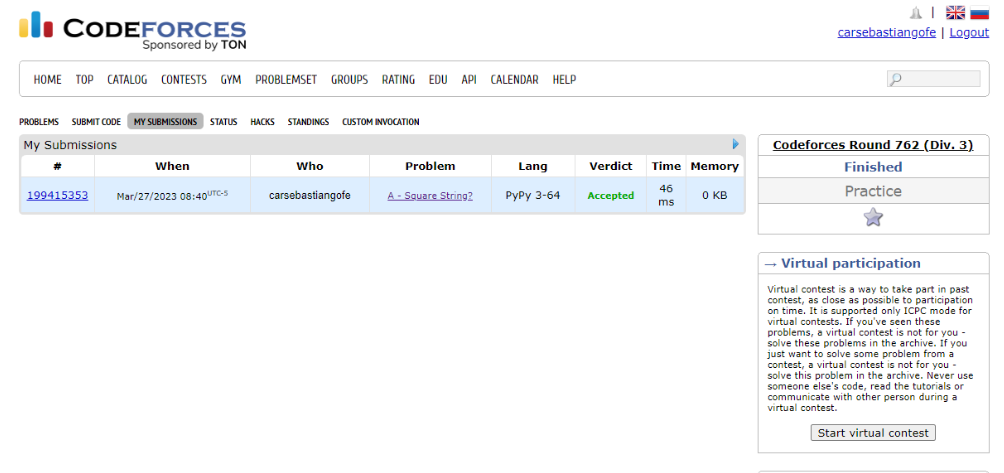

In [ ]:
n = int(input())
for i in range(n):
    word = input().strip()
    size = len(word)

    if size % 2 != 0:
        print('NO')
    else:
        middle = size//2
        if(word[:middle]==word[middle:]):
            print('YES')
        else:
            print('NO')